# ESTAD√çSTICAS AMBULATORIO HMN

Esta p√°gina provee una serie de pasos para procesar informaci√≥n a partir de archivos `.csv` espec√≠ficos del **Hospital Materno Neonatal**.

Se provee, adem√°s, una serie de funciones que agilizan el procesamiento y generaci√≥n de tablas y gr√°ficos a partir de la informaci√≥n procesada.

In [43]:
# Get ambulatory csv file
!wget https://raw.githubusercontent.com/markitos314/statistical_analysis_for_patients_records/main/ambulatory_masked.csv

--2021-12-16 17:14:32--  https://raw.githubusercontent.com/markitos314/statistical_analysis_for_patients_records/main/ambulatory_masked.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5395026 (5.1M) [text/plain]
Saving to: ‚Äòambulatory_masked.csv.1‚Äô

ambulatory_masked.c 100%[===================>]   5.14M  --.-KB/s    in 0.04s   

2021-12-16 17:14:32 (130 MB/s) - ‚Äòambulatory_masked.csv.1‚Äô saved [5395026/5395026]



## Importar las funciones para el procesamiento de datos

Las funciones espec√≠ficas para el tratamiento de los archivos `.csv` se encuentran en un repositorio, de manera tal que pueden ser descargadas en bloque y luego importar la que sea necesaria.

Cada funci√≥n tiene su *docstring* explicando qu√© es necesario ingresarle y qu√© devuelve, junto con el procesamiento que realiza en cada caso.

Para tener las funciones en nuestro directorio de trabajo, las descargamos con el siguiente comando: ‚¨áÔ∏è

In [44]:
!wget https://raw.githubusercontent.com/markitos314/HMN/main/hmn_functions.py

--2021-12-16 17:14:32--  https://raw.githubusercontent.com/markitos314/HMN/main/hmn_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50413 (49K) [text/plain]
Saving to: ‚Äòhmn_functions.py.1‚Äô

hmn_functions.py.1  100%[===================>]  49.23K  --.-KB/s    in 0.003s  

2021-12-16 17:14:33 (13.9 MB/s) - ‚Äòhmn_functions.py.1‚Äô saved [50413/50413]



In [45]:
csv_file = 'ambulatory_masked.csv'

## Uso de las funciones

Las funciones que hay disponibles son:

### preprocess_ambulatorio
Sirve particularmente para los `.csv` de la parte de ambulatirio, ya que los de emergencias tienen otra estructura. Para utilizarla, ejecutar lo siguiente:
  * `from hmn_functions import preprocess_ambulatorio`, y luego
  * `dataframe` = preprocess_ambulatorio('directorio/donde/se/encuentra/el/.csv')

> *Nota:* sustituir la palabra '*dataframe*' por el nombre que se le quiera dar a la variable (por ejemplo, ambulatorio_enero [si fuera de las atenciones de ambulatorio en enero], o ambulatorio_2021 [si fueran todas las atenciones de ambulatorio en el a√±o 2021].

In [46]:
import pandas as pd
prueba = pd.read_csv(csv_file, index_col=False)
prueba.head(10)

Unnamed: 0  ... Unnamed: 15
0   e3220155  ...         NaN
1   331db768  ...         NaN
2   331db768  ...         NaN
3   38e8c4f5  ...         NaN
4   726d3f39  ...         NaN
5   760af333  ...         NaN
6   6c8368b9  ...         NaN
7   0c90f659  ...         NaN
8   1ab523a3  ...         NaN
9   462ae8bf  ...         NaN

[10 rows x 16 columns]

In [47]:
# Ejemplo:
from hmn_functions import preprocess_ambulatorio
ambulatorio = preprocess_ambulatorio(csv_file)

In [48]:
ambulatorio

DNI      NHC  ... CIE10                       DESC_CIE10
0      9e18b92c  f706b13  ...   R10        Dolor abdominal y p√©lvico
1      9e18b92c  f706b13  ...   Z30  Atenci√≥n para la anticoncepci√≥n
2      aae4e9db  e148105  ...   Z30  Atenci√≥n para la anticoncepci√≥n
3      3382e394  e24aee9  ...   Z30  Atenci√≥n para la anticoncepci√≥n
4      3382e394  e24aee9  ...   NaN                              NaN
...         ...      ...  ...   ...                              ...
30738  f15239bf  8d018dd  ...   NaN                              NaN
30739  719cbf31  1108070  ...   NaN                              NaN
30740  1bfafe4b  2d82af0  ...   NaN                              NaN
30741  5f40858b  3068dd5  ...   NaN                              NaN
30742  6fff4e45  f6c8ff8  ...   NaN                              NaN

[30743 rows x 14 columns]

### concatenate_dfs
Se usa si se procesaron varios `.csv` y se quieren unir para que queden en uno solo. Para utilizarla, ejecutar lo siguiente:
  * `from hmn_functions import concatenate_dfs`, y luego
  * concatenate_dfs([dataframe1, dataframe2, dataframe3])

### atenciones
Imprime una tabla y/o un gr√°fico de torta de las atenciones del dataframe en el per√≠odo del dataframe ingresado, divididas por servicio o por secci√≥n. Para utilizarla, ejecutar lo siguiente:
  * `from hmn_functions import atenciones`, y luego
  * atenciones(dataframe)

Por defecto imprime el gr√°fico de barras **por servicio**. Para elegir criterios cuando se llama la funci√≥n agregar las siguientes variables:
* `por_seccion = True` (por defecto) --> para incluir gr√°ficos divididos por secci√≥n. De lo contrario, `por_seccion = False`
* `por_servicio = True` --> para incluir gr√°ficos divididos por servicio. De lo contrario, `por_servicio = False`
* `barra = True` (por defecto)  --> para incluir gr√°fico de barra. De lo contrario, `barra = False`
* `torta = True` --> para incluir gr√°fico de torta. De lo contrario, `torta = False`

Atenciones por servicio (Total = 30743)



SERVICIO  CANTIDADES    % TOTAL
0                   Obstetricia        9835  31.991022
1                   Ginecolog√≠a        3448  11.215561
2                  Salud Mental        2803   9.117523
3                  Infectolog√≠a        2709   8.811762
4                Fonoaudiolog√≠a        2387   7.764369
5                  Adolescencia        1856   6.037147
6                  Neonatolog√≠a        1585   5.155645
7                           SSR        1537   4.999512
8                   Hemoterapia        1137   3.698403
9               Endocrinolog√≠a          648   2.107797
10              Servicio Social         525   1.707706
11                  Odontolog√≠a         502   1.632892
12               Cl√≠nica M√©dica         449   1.460495
13                 Reumatologia         434   1.411703
14                  Cardiolog√≠a         340   1.105943
15                    Nutrici√≥n         248   0.806688
16                 Dermatolog√≠a          93   0.302508
17                     Gen√©tica          83   0.269980
18                    Oncologia          72   0.234200
19  Kinesiolog√≠a y Fisioterapia          51   0.165891
20              Cirug√≠a General           1   0.003253

<Figure size 432x288 with 0 Axes>

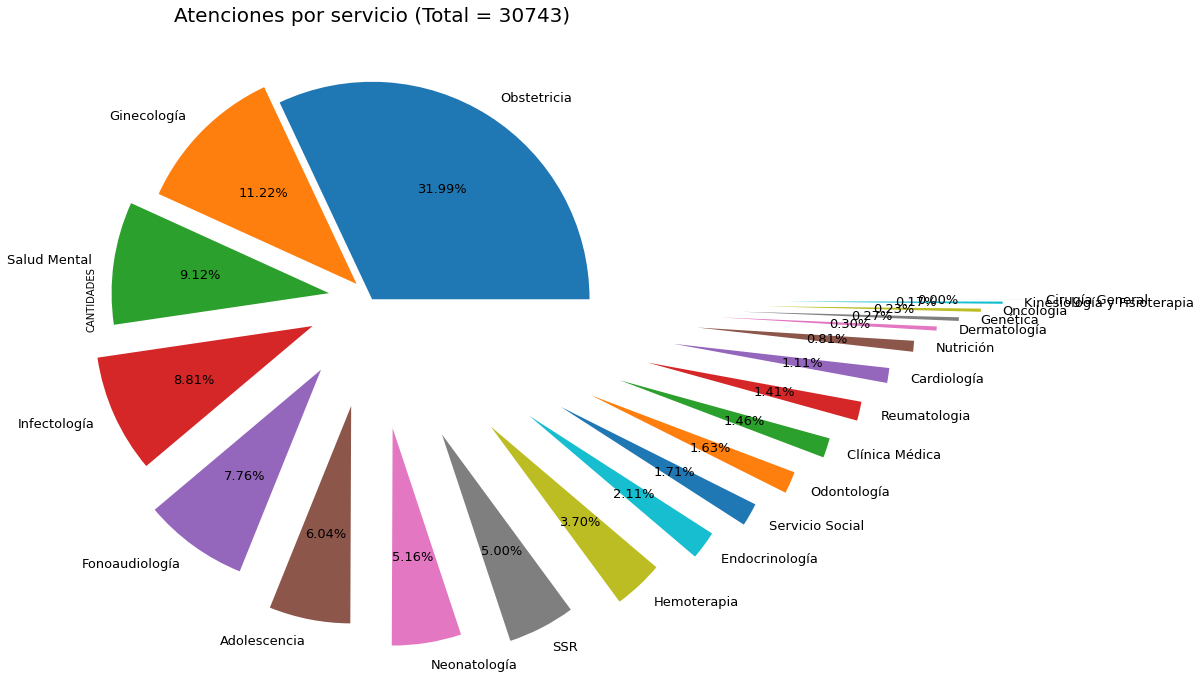

<Figure size 432x288 with 0 Axes>

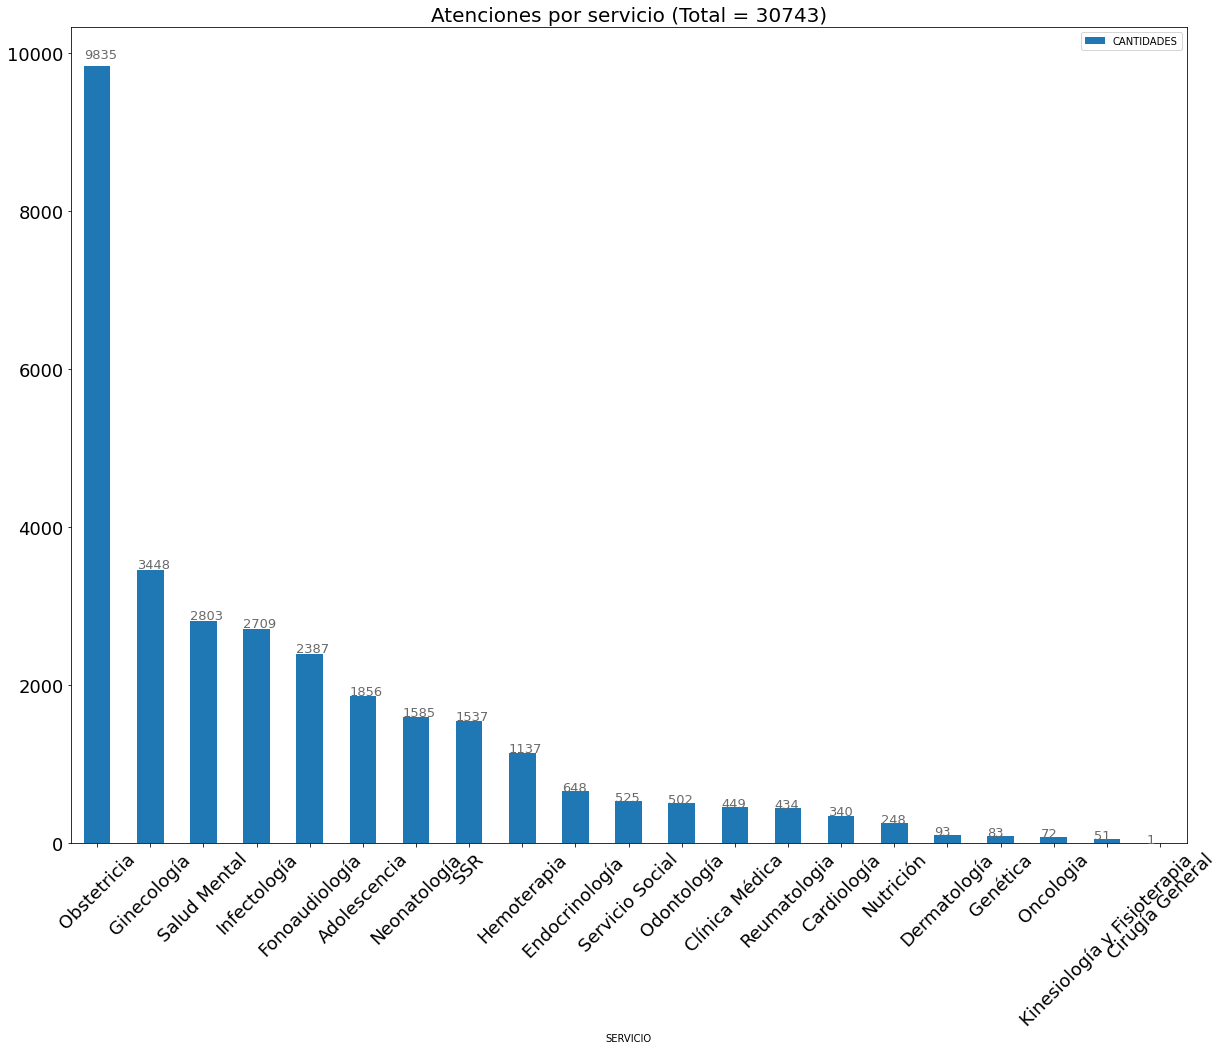

In [49]:
# Ejemplo:
from hmn_functions import atenciones
atenciones(ambulatorio, por_seccion=False, por_servicio=True, torta=True, barra=True)

### atenciones_por_hora_ambulatorio
Imprime un gr√°fico de barras de las atenciones en cada hora, en el per√≠odo del dataframe ingresado. Y luego un gr√°fico de barra de las atenciones en cada hora de cada secci√≥n en el per√≠odo del dataframe ingresado.

Se puede elegir imprimir la discriminaci√≥n por servicio, con la variable `por_servicio = True` o `por_servicio = False` respectivamente. 

Por defecto `por_servicio = False`

Para utilizarla, ejecutar lo siguiente:
  * `from hmn_functions import atenciones_por_hora_ambulatorio`, y luego
  * atenciones_por_hora_ambulatorio(dataframe, por_servicio=True)

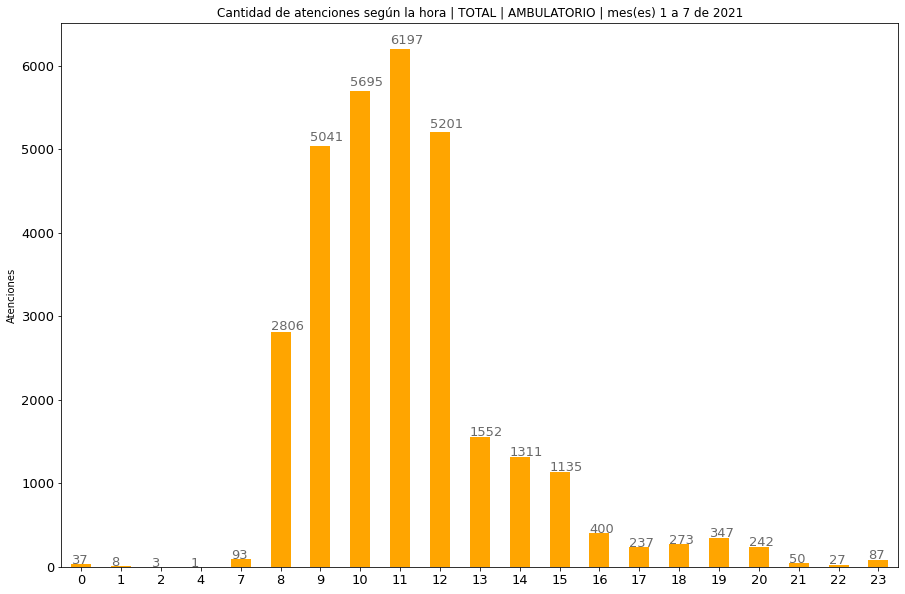

In [50]:
# Ejemplo:
from hmn_functions import atenciones_por_hora_ambulatorio
atenciones_por_hora_ambulatorio(ambulatorio)

### atenciones_por_dia_semana_ambulatorio
Imprime un gr√°fico de barras de las atenciones por d√≠a de la semana, en el per√≠odo del dataframe ingresado. Y luego un gr√°fico de barra de las atenciones por d√≠a de la semana de cada secci√≥n en el per√≠odo del dataframe ingresado. 

Se puede elegir imprimir la discriminaci√≥n por servicio, con la variable `por_servicio = True` o `por_servicio = False` respectivamente. 

Por defecto `por_servicio = False`

Para utilizarla, ejecutar lo siguiente:
  * `from hmn_functions import atenciones_por_dia_semana`, y luego
  * atenciones_por_dia_semana(dataframe, por_servicio=True)

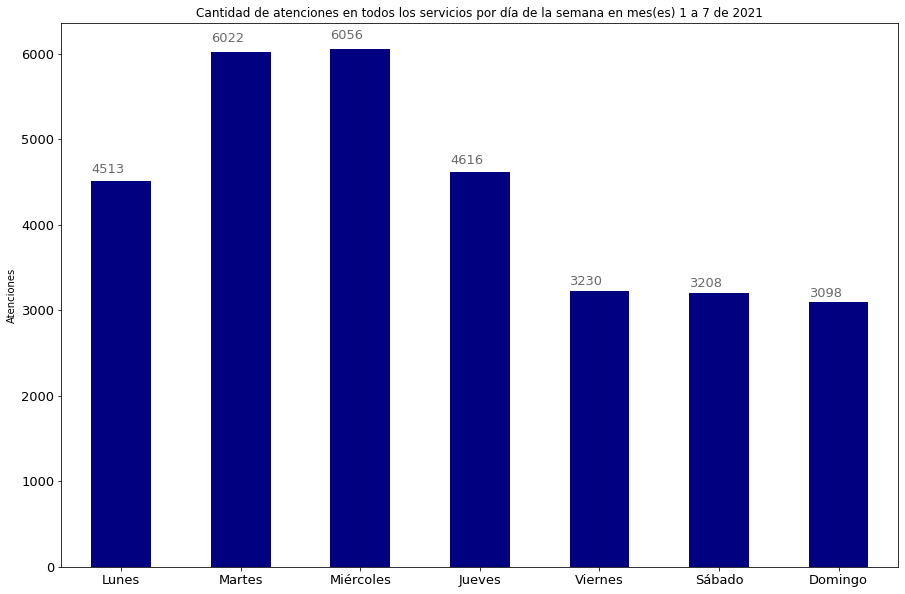

In [51]:
# Ejemplo:
from hmn_functions import atenciones_por_dia_semana_ambulatorio
atenciones_por_dia_semana_ambulatorio(ambulatorio)

### atenciones_grupo_etareo_ambulatorio
Imprime un gr√°fico de tortas de las atenciones por grupo et√°reo, en el per√≠odo del dataframe ingresado. Y luego un gr√°fico de barra de las atenciones por d√≠a de la semana de cada secci√≥n en el per√≠odo del dataframe ingresado. 

Por conveniencia, las franjas et√°reas se dividieron de la siguiente manera:

* 0 a√±os,
* 1 a 13 a√±os,
* 14 a 21 a√±os,
* 22 a 40 a√±os,
* 41 a 60 a√±os,
* 61 √≥ m√°s a√±os.

Se puede elegir imprimir la discriminaci√≥n por servicio, con la variable `por_servicio = True` o `por_servicio = False` respectivamente. 

Por defecto `por_servicio = False`

Para utilizarla, ejecutar lo siguiente:

  * `from hmn_functions import atenciones_grupo_etareo_ambulatorio`, y luego
  * atenciones_grupo_etareo_ambulatorio(dataframe)

/content/hmn_functions.py:793: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(15,10))


<Figure size 432x288 with 0 Axes>

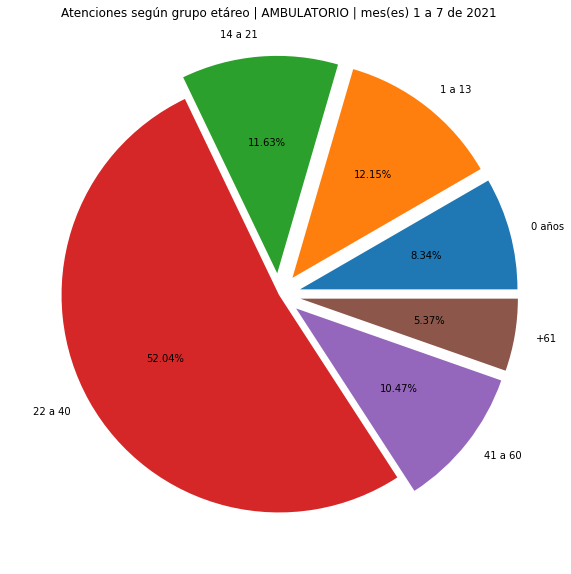

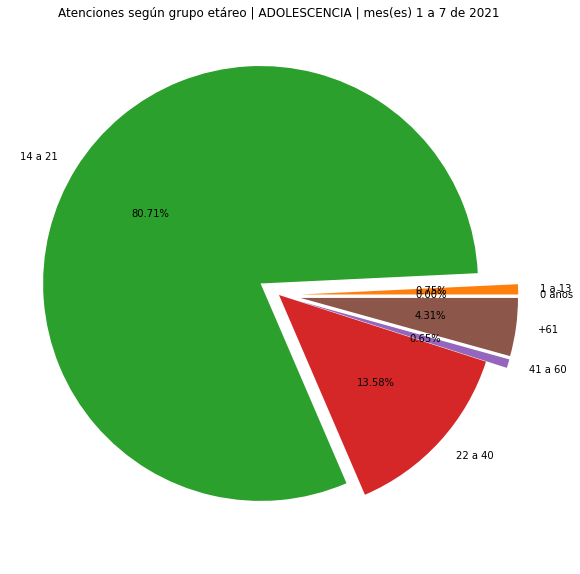

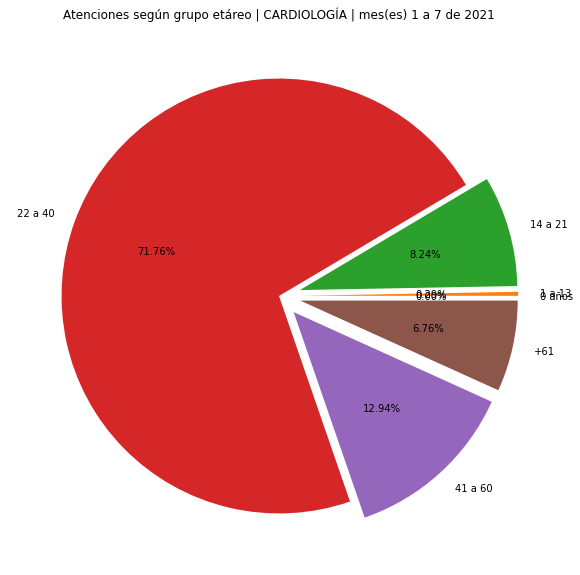

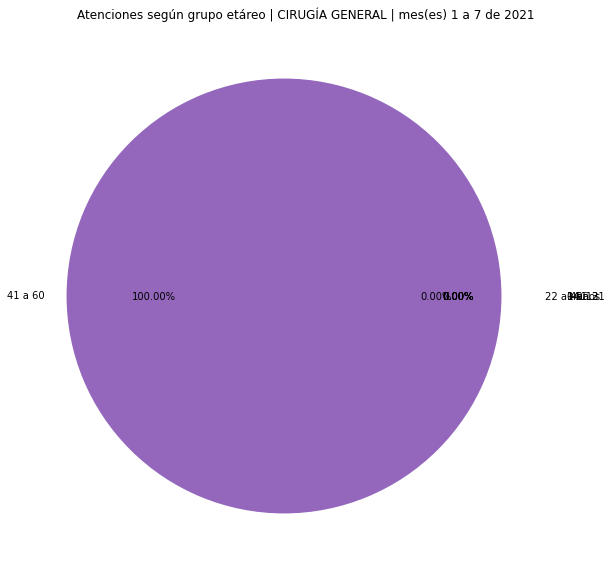

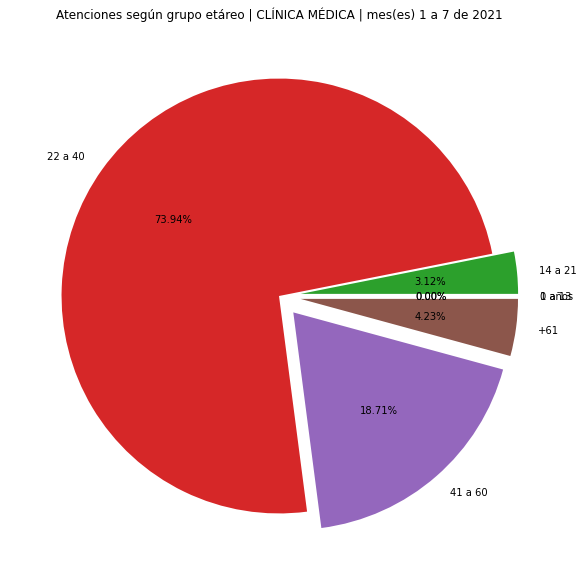

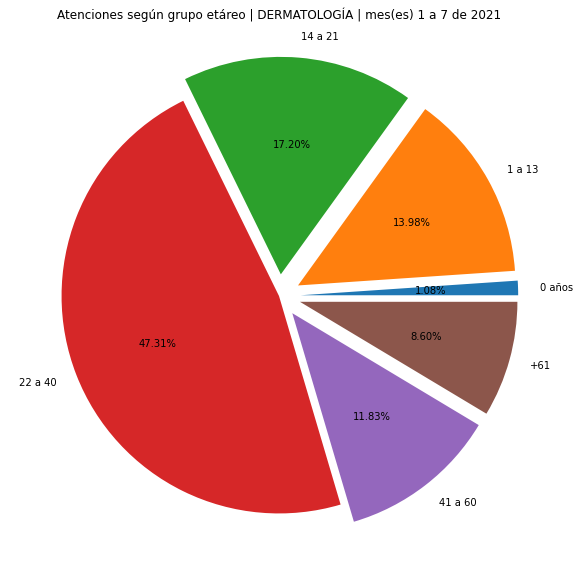

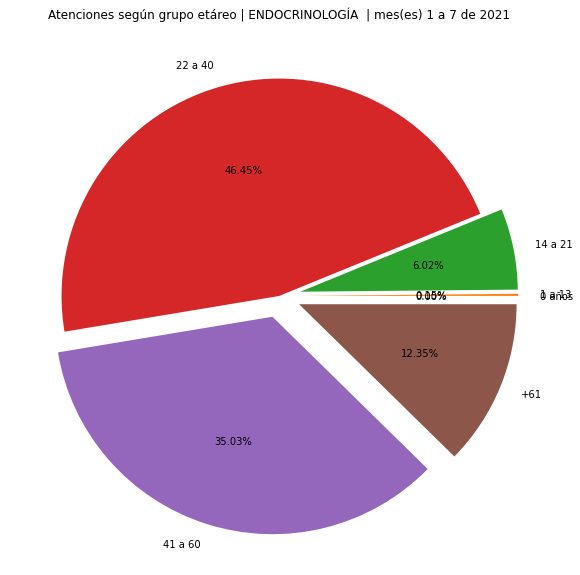

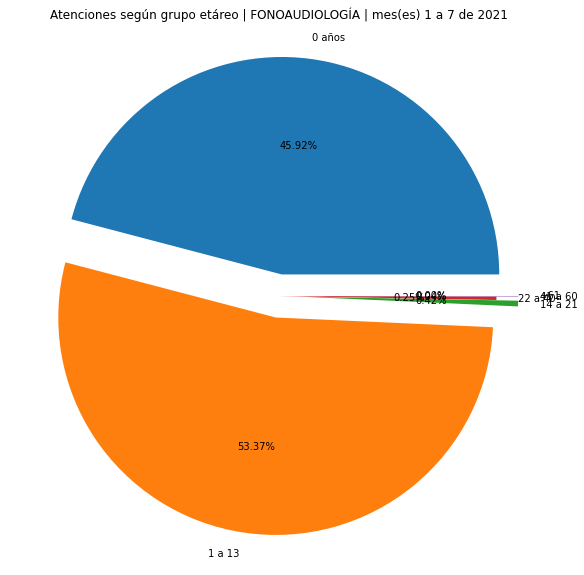

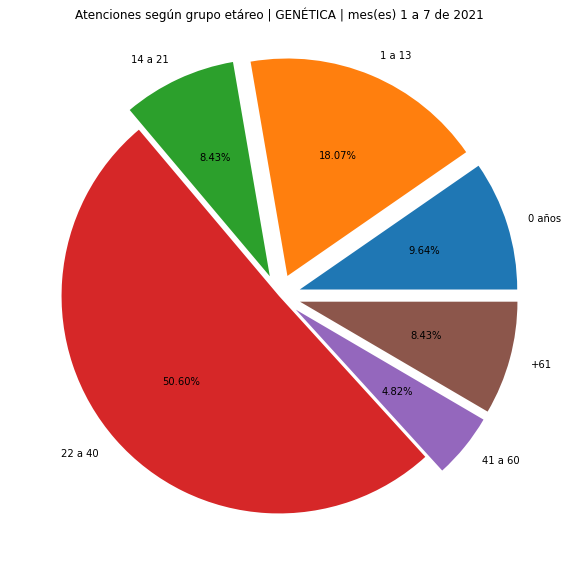

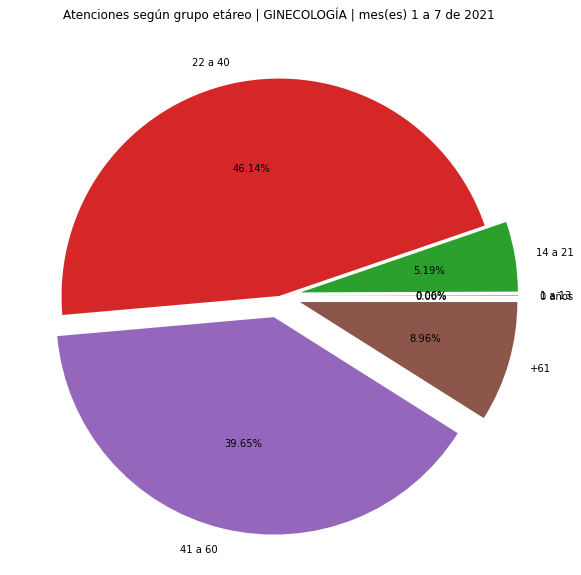

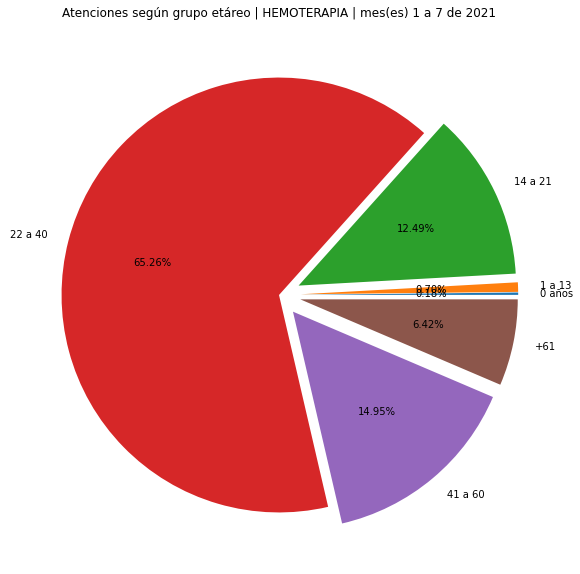

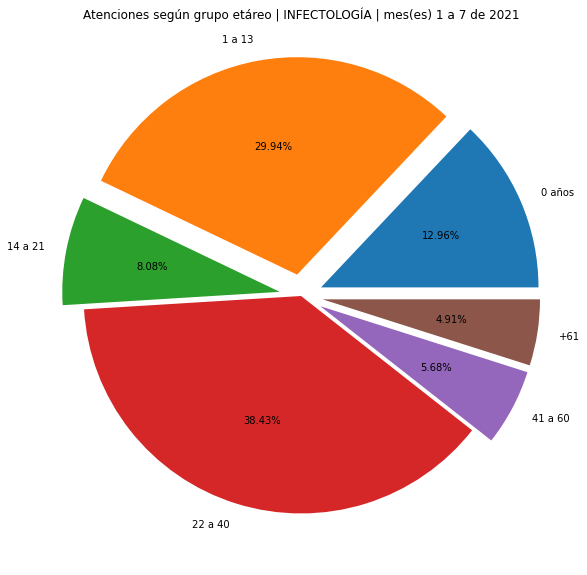

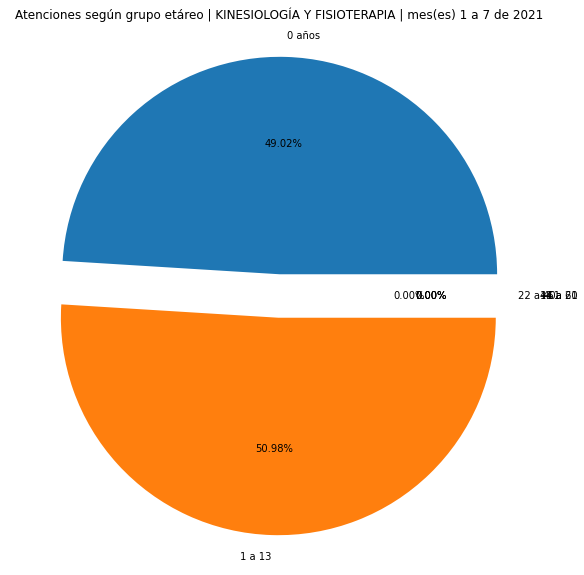

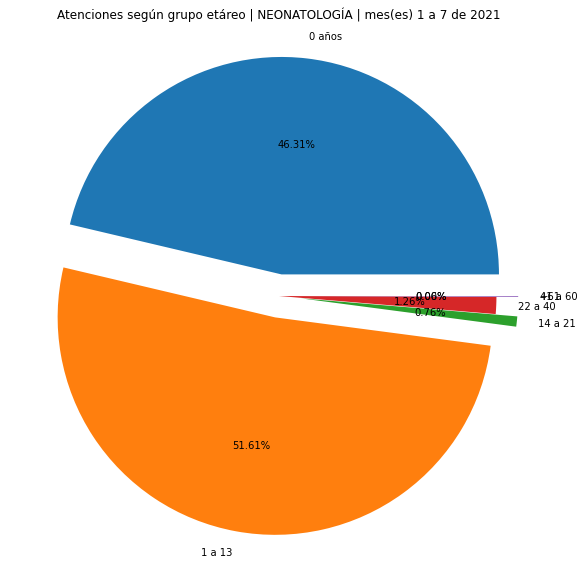

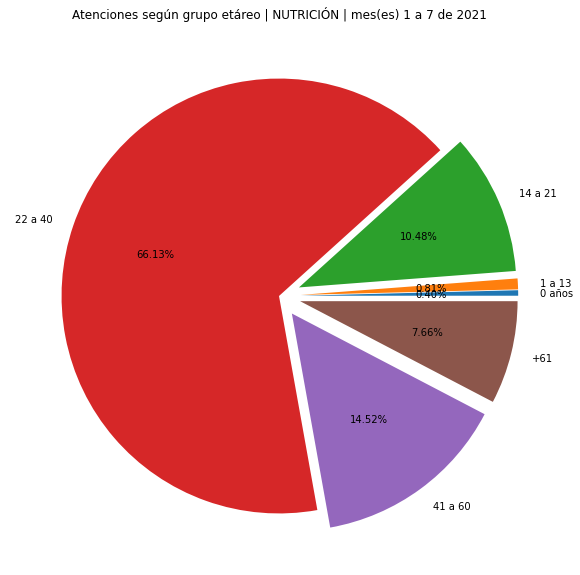

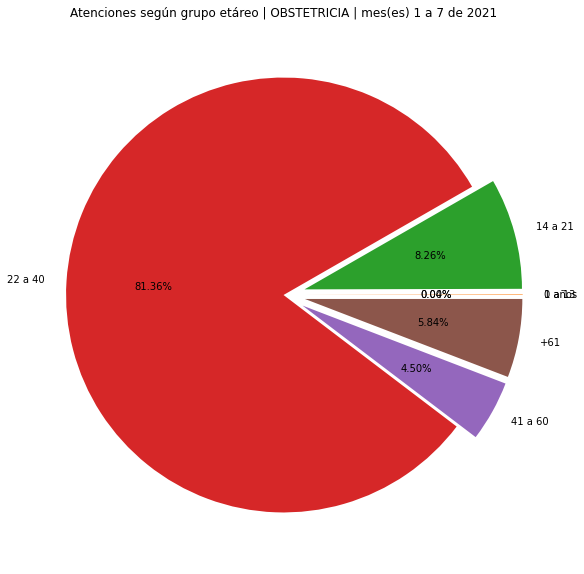

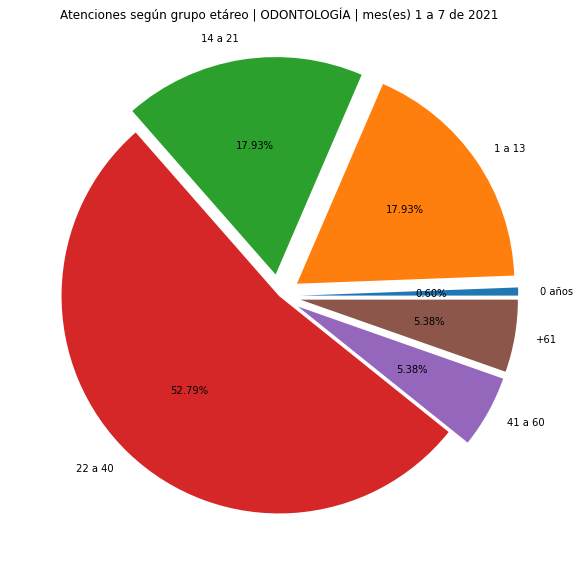

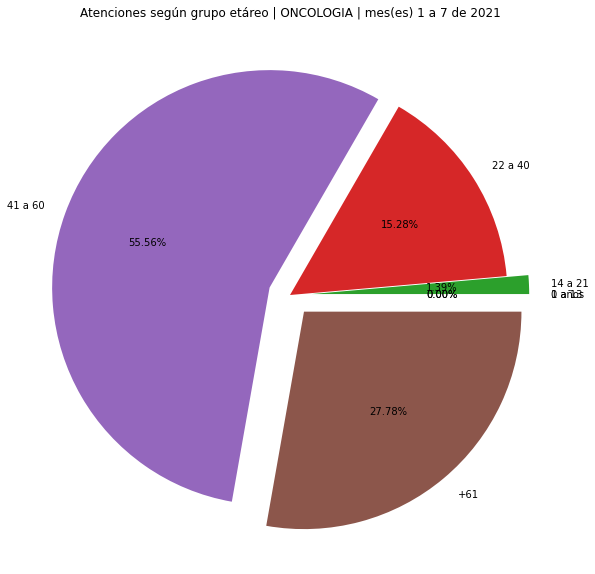

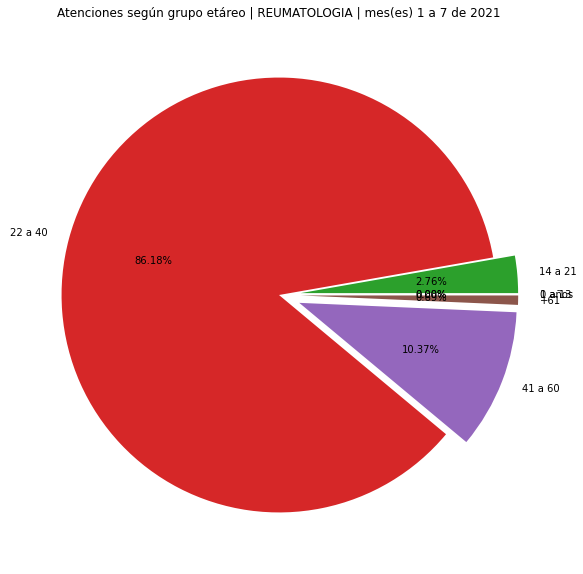

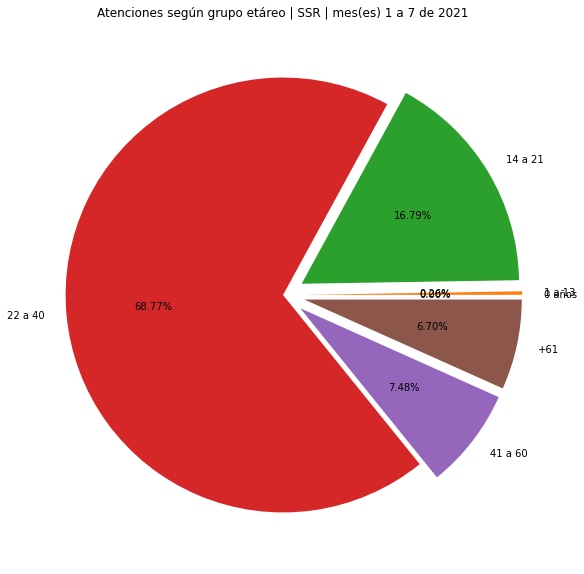

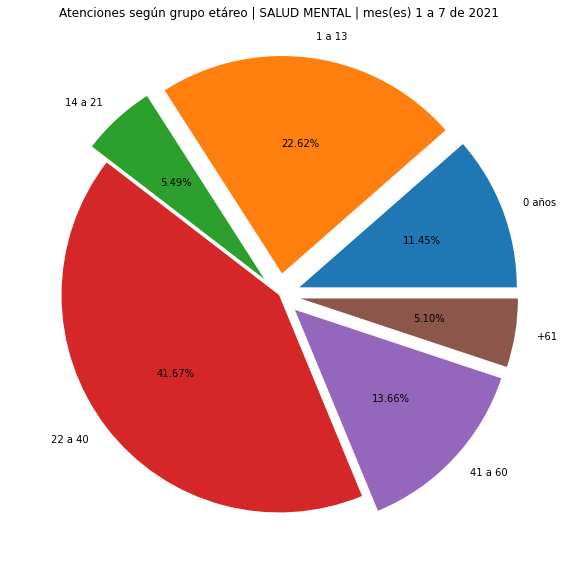

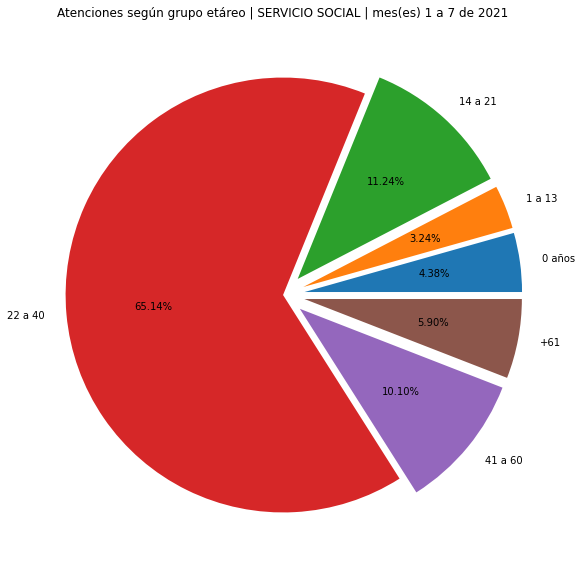

In [52]:
# Ejemplo:
from hmn_functions import atenciones_grupo_etareo_ambulatorio
atenciones_grupo_etareo_ambulatorio(ambulatorio, por_servicio=True)

### motivo_alta
Imprime una tabla y un gr√°fico de barras horizontal de los distintos motivos de alta, en el per√≠odo del dataframe ingresado. Y luego un gr√°fico de barra de las atenciones por d√≠a de la semana de cada secci√≥n en el per√≠odo del dataframe ingresado.

Para utilizarla, ejecutar lo siguiente:

  * `from hmn_functions import motivo_alta`, y luego
  * motivo_alta(dataframe)

MOTIVO_ALTA  CANTIDAD
0                     NaN     29558
1      Tratamiento m√©dico       814
2             Otro motivo       161
3  Tratamiento quir√∫rgico       132
4         Mejor√≠a Cl√≠nica        78

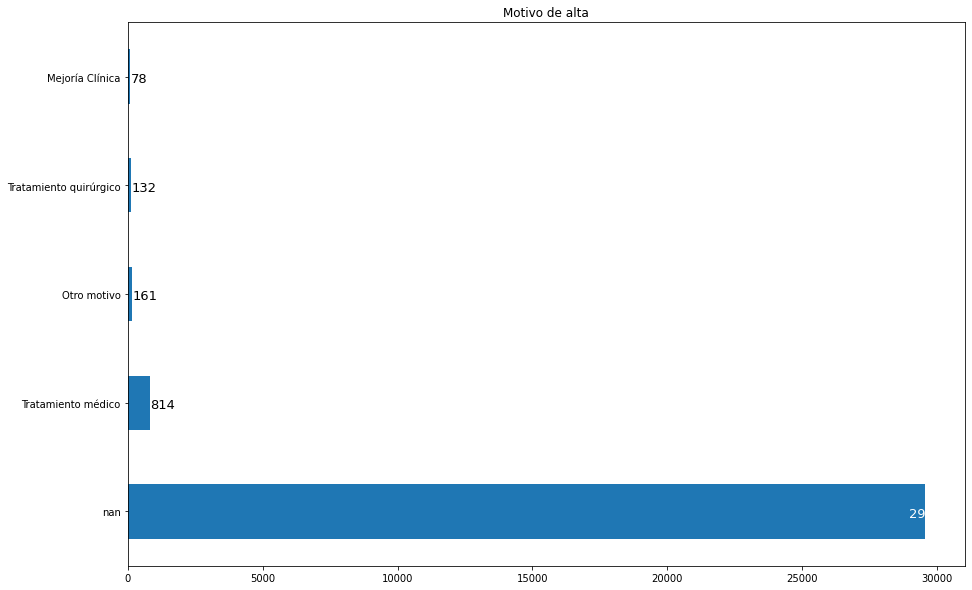

In [53]:
# Ejemplo:
from hmn_functions import motivo_alta
motivo_alta(ambulatorio)

### top_20_cod_diagnostics_ambulatorio
Imprime un gr√°fico de barras de los 20 diagn√≥sticos m√°s repetidos (codificados), en el per√≠odo del dataframe ingresado. Y luego un gr√°fico de barra de los 20 diagn√≥sticos m√°s repetidos (codificados) por secci√≥n en el per√≠odo del dataframe ingresado.

> üîë **Nota:** Si la secci√≥n tiene s√≥lo diagn√≥sticos sin codificar (figurar√°n con la leyenda 'nan', se graficar√°n s√≥lo esos. De lo contrario los dem√°s gr√°ficos NO muestran los diagn√≥sticos no codificados. 

Los totales figuran en el t√≠tulo del gr√°fico.

Por defecto imprime el gr√°fico de barras **por servicio**. Para elegir criterios cuando se llama la funci√≥n agregar las siguientes variables:
* `por_seccion = True` (por defecto) --> para incluir gr√°ficos divididos por secci√≥n. De lo contrario, `por_seccion = False`
* `por_servicio = True` --> para incluir gr√°ficos divididos por servicio. De lo contrario, `por_servicio = False`

> üîë**Nota:** las variables `por_seccion` y `por_servicio` NO pueden estar en `True` al mismo tiempo.

Para utilizarla, ejecutar lo siguiente:

  * `from hmn_functions import top_20_cod_diagnostics_ambulatorio`, y luego
  * top_20_cod_diagnostics_ambulatorio(dataframe)


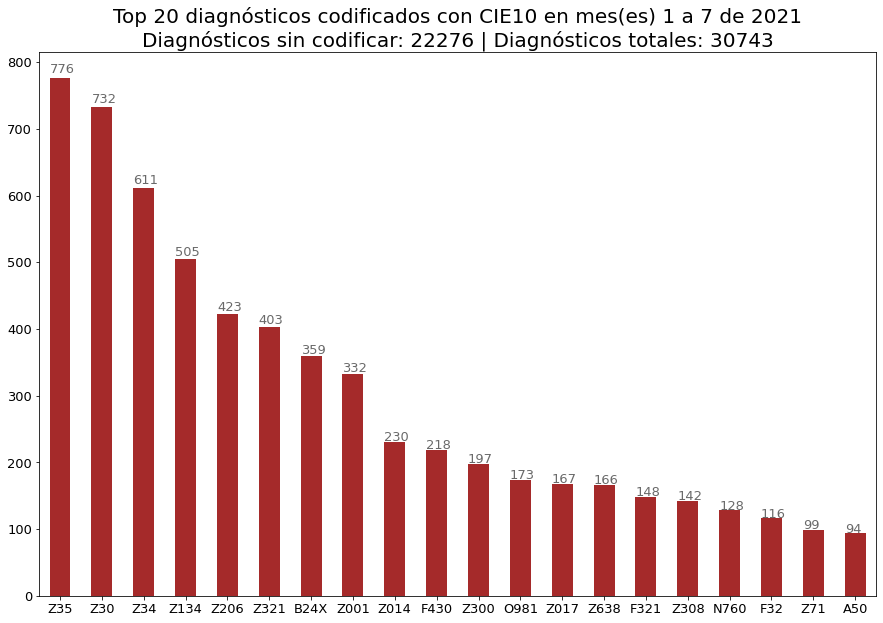

In [54]:
# Ejemplo:
from hmn_functions import top_20_cod_diagnostics_ambulatorio
top_20_cod_diagnostics_ambulatorio(ambulatorio)